Nama : Nimas Ristiya Rahma
Program : Bangkit Academy 2024

Predictive Analytics - Prediksi Penghasilan Karyawan Berdasarkan Lama Pengalaman Bekerja

Deskripsi Proyek

Topik proyek ini berfokus pada ekonomi dan bisnis, khususnya dalam konteks perekrutan karyawan baru. Perusahaan ingin mengetahui kisaran gaji yang sesuai berdasarkan lama pengalaman kerja para calon pelamar. Untuk mencapai tujuan tersebut, perusahaan akan menerapkan dua model machine learning dan memilih model yang memberikan prediksi paling akurat.

In [1]:
# Install public API Kaggle
!pip install -q kaggle

In [2]:
# Install library untuk proses data loading dan visualisasi data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Impor library untuk data preparation
from sklearn.preprocessing import StandardScaler

# Impor library untuk split data
from sklearn.model_selection import train_test_split

# Impor metrik
from sklearn.metrics import mean_squared_error

# Impor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

**2. Data Understanding**

"Pemahaman Data adalah proses untuk memahami informasi yang terkandung dalam data dan menilai kualitas data tersebut."

2.1 Data Loading

"Pemrosesan Data adalah langkah untuk memuat dataset yang akan digunakan sehingga dataset tersebut lebih mudah untuk dianalisis."

Dataset : https://www.kaggle.com/datasets/rubydoby/years-of-experience-and-employees-salary

In [3]:
# Membuat direktori baru bernama kaggle
!rm -rf ~/.kaggle && mkdir ~/.kaggle/

# Menyalin berkas kaggle.json pada direktori aktif saat ini ke direktori kaggle
!mv kaggle.json ~/.kaggle/kaggle.json

# Mengubah permission berkas
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d rubydoby/years-of-experience-and-employees-salary

# Ekstrak berkas zip
!unzip /content/years-of-experience-and-employees-salary.zip

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rubydoby/years-of-experience-and-employees-salary
License(s): unknown
  0% 0.00/3.32k [00:00<?, ?B/s]
100% 3.32k/3.32k [00:00<00:00, 5.26MB/s]
Archive:  /content/years-of-experience-and-employees-salary.zip
  inflating: employee_salaries.csv   


In [4]:
# Melihat isi dataset
salary = pd.read_csv('/content/employee_salaries.csv')
salary

,Years of Experience,Salary
0,8.0,85000.0
1,20.0,482000.0
2,12.0,112000.0
3,11.0,95000.0
4,16.0,230000.0
...,...,...
1495,9.0,88000.0
1496,18.0,303000.0
1497,8.0,86000.0
1498,11.0,94000.0


2.2 Exploratory Data Analysis (EDA)
"Analisis Data Eksploratif adalah proses awal dalam memeriksa data untuk menganalisis karakteristiknya, mengidentifikasi pola, mendeteksi anomali, dan memverifikasi asumsi yang ada. Teknik ini biasanya melibatkan penggunaan statistik serta representasi grafis atau visualisasi."

2.2.1 EDA - Deskripsi Variabel

In [5]:
# Melihat informasi pada dataset
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  1500 non-null   float64
 1   Salary               1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


In [6]:
# Mengecek deskripsi statistik data
salary.describe()

,Years of Experience,Salary
count,1500.000000,1500.000000
mean,10.790000,112627.333333
std,3.028533,46151.075113
min,1.000000,40000.000000
25%,9.000000,88000.000000
50%,11.000000,94000.000000
75%,13.000000,117250.000000
max,20.000000,500000.000000


2.2.2 EDA - Menangani Missing Value dan Outliers

In [7]:
# Mengecek dataset jika ada yang kosong
salary.isna().sum()

,0
Years of Experience,0
Salary,0


In [8]:
# Menghapus baris data jika ada yang kosong
salary = salary.dropna(axis=0)
salary.shape

(1500, 2)

<Axes: xlabel='Years of Experience'>

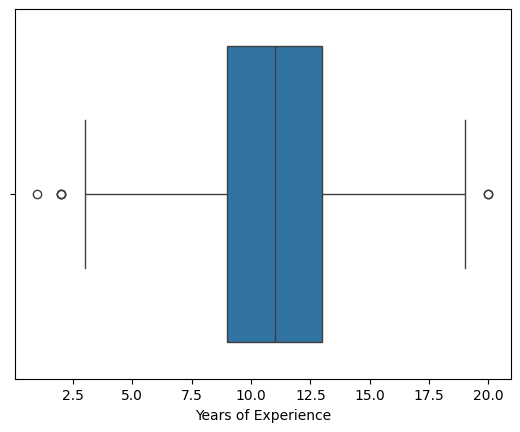

In [9]:
# Visualisasi pada fitur untuk melihat outliers
sns.boxplot(x=salary['Years of Experience'])

<Axes: xlabel='Salary'>

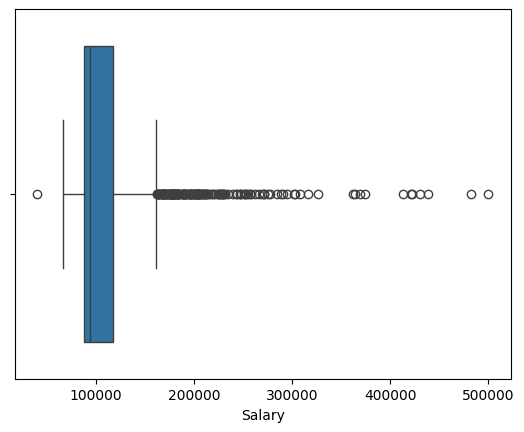

In [10]:
# Visualisasi pada fitur untuk melihat outliers
sns.boxplot(x=salary['Salary'])

In [11]:
# Menangani outliers dengan IQR method
Q1 = salary.quantile(0.25)
Q3 = salary.quantile(0.75)
IQR=Q3-Q1
salary=salary[~((salary<(Q1-1.5*IQR))|(salary>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah outliers di drop
salary.shape

(1338, 2)

2.2.3 EDA - Univariate Analysis

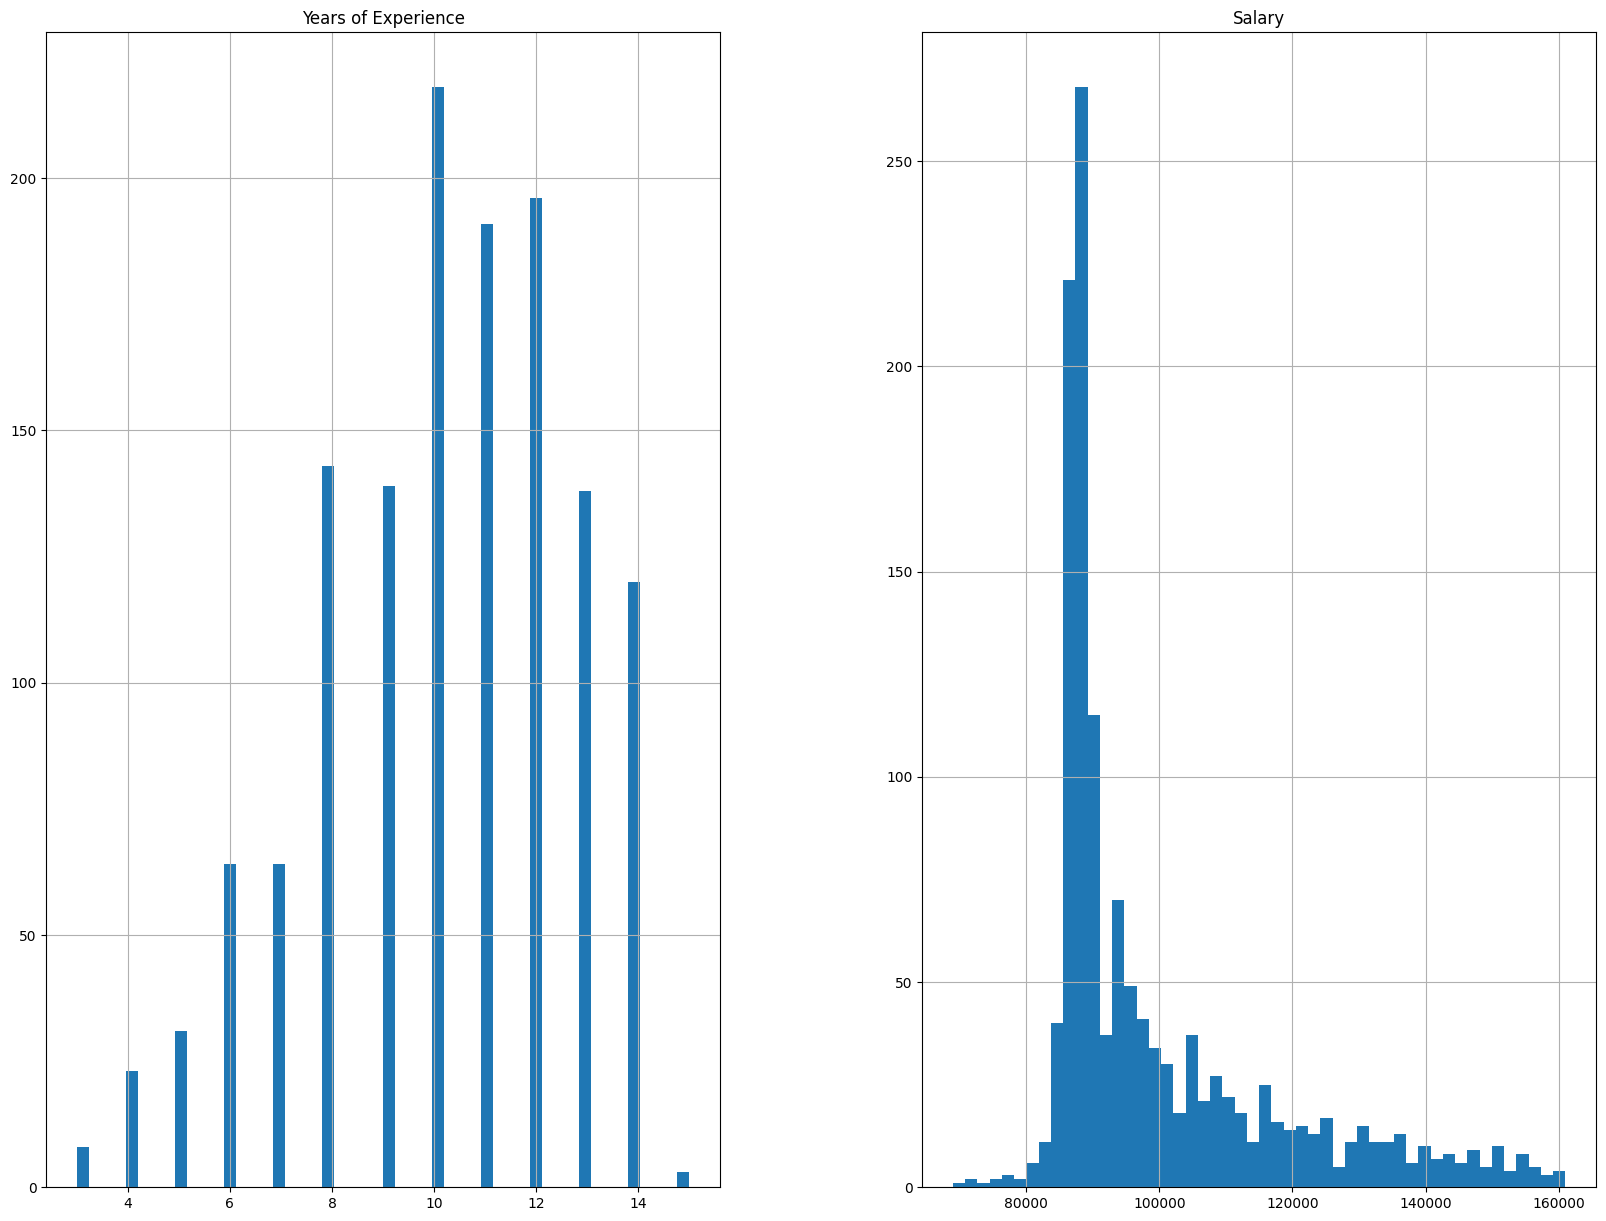

In [12]:
# Visualisasi fitur numerik untuk melihat masing-masing histogram
salary.hist(bins=50, figsize=(20,15))
plt.show()

2.2.4 EDA - Multivariate Analysis

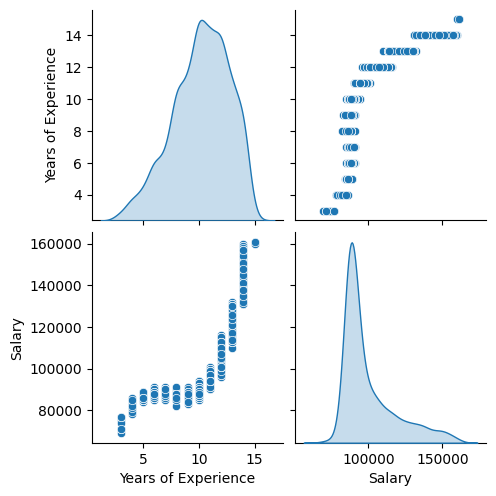

In [13]:
# Mengamati hubungan antar fitur dengan fungsi pairplot()
sns.pairplot(salary, diag_kind = 'kde')

Text(0.5, 1.0, 'Matriks Korelasi untuk Fitur Numerik ')

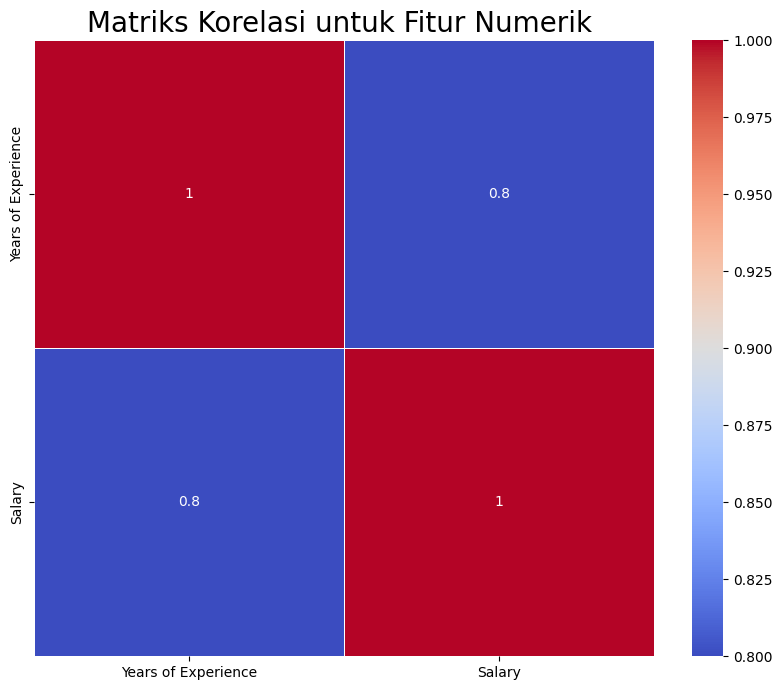

In [14]:
# Mengamati korelasi antar fitur dengan menggunakan heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = salary.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Matriks Korelasi untuk Fitur Numerik ", size=20)

**3. Data Preparation**

"Persiapan Data adalah langkah untuk menyiapkan data sebelum memasuki tahap pembuatan model Machine Learning."

3.1 Train-Test-Split

In [15]:
# Membagi dataset menjadi data latih dan data uji, kali ini proporsi pembagiannya adalah 90:10
X = salary.drop(["Salary"],axis =1)
y = salary["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [16]:
print(f'Total seluruh sampel dalam dataset: {len(X)}')
print(f'Total sampel dalam train dataset: {len(X_train)}')
print(f'Total samepl dalam test dataset: {len(X_test)}')

Total seluruh sampel dalam dataset: 1338
Total sampel dalam train dataset: 1204
Total samepl dalam test dataset: 134


3.2 Standarisasi

In [17]:
# Melakukan proses standarisasi pada data latih menggunakan StandardScaler
numerical_features = ['Years of Experience']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Years of Experience
1466,0.715844
920,-0.479546
750,1.114308
280,-0.081083
1099,-0.479546


In [18]:
# Melihat statistik data yang sudah di standarisasi
X_train[numerical_features].describe().round(4)

,Years of Experience
count,1204.0000
mean,0.0000
std,1.0004
min,-2.8703
25%,-0.4795
50%,-0.0811
75%,0.7158
max,1.9112


**4. Model Development**

"Pengembangan Model adalah tahap di mana kita menerapkan algoritma machine learning untuk menyelesaikan masalah yang telah dirumuskan pada tahap pemahaman bisnis."

4.1 Mempersiapkan dataframe untuk analisis model

In [19]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['LinearRegression'])

4.2 Membuat Model dengan Algoritma Linear Regression

In [20]:
LR = LinearRegression(n_jobs = -1)
LR.fit(X_train,y_train)
models.loc['train_mse','LR'] = mean_squared_error(y_pred=LR.predict(X_train), y_true=y_train)

**5. Evaluasi Model**

"Evaluasi Model adalah tahap untuk memastikan bahwa model sesuai dengan tujuan yang telah ditetapkan dan dapat menghasilkan prediksi yang akurat."

In [21]:
# Melakukan standarisasi terhadap fitur numerik pada data uji
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])


5.1 Evaluasi Model Menggunakan Metrik MSE

In [22]:
# Membuat variabel mse yang berisi dataframe dari nilai mse data latih dan data uji pada model
mse = pd.DataFrame(columns=['train', 'test'], index=['LinearRegression'])

# Membuat dictionary untuk algoritma model yang digunakan
model_dict = {'LinearRegression': LR}

# Menghitung Mean Squared Error algoritma pada data latih dan data uji
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# memanggil mse
mse

,train,test
LinearRegression,113458.095232,127004.94334


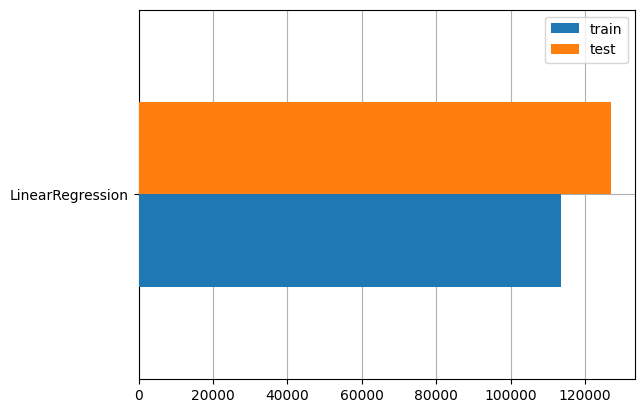

In [23]:
# Visualisasi plot metrik
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

5.2 Melakukan Pengujian

In [24]:
# Melakukan pengujian terhadap model
prediksi = X_test.iloc[2:3].copy()
pred_dict = {'y_true':y_test[2:3]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_LinearRegression
354,87000.0,81493.4


**6. Improvement**

Karena hasil prediksi menggunakan algoritma Linear Regression belum cukup akurat dibandingkan dengan nilai sebenarnya, kita akan membandingkannya dengan algoritma lain, yaitu Random Forest.

6.1 Membuat Model dengan Algoritma Random Forest

In [25]:
# Membuat model prediksi menggunakan algoritma Random Forest
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

6.2 Membandingkan Hasil Evaluasi dari Kedua Model Menggunakan Metrik MSE

In [26]:
# Membuat variabel mse yang berisi dataframe dari nilai mse data latih dan data uji pada model
mse = pd.DataFrame(columns=['train', 'test'], index=['LinearRegression', 'RandomForest'])

# Membuat dictionary untuk algoritma model yang digunakan
model_dict = {'LinearRegression': LR, 'RandomForest': RF}

# Menghitung Mean Squared Error algoritma pada data latih dan data uji
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Memanggil mse untuk membandingkan model
mse

,train,test
LinearRegression,113458.095232,127004.94334
RandomForest,13235.129443,15922.675464


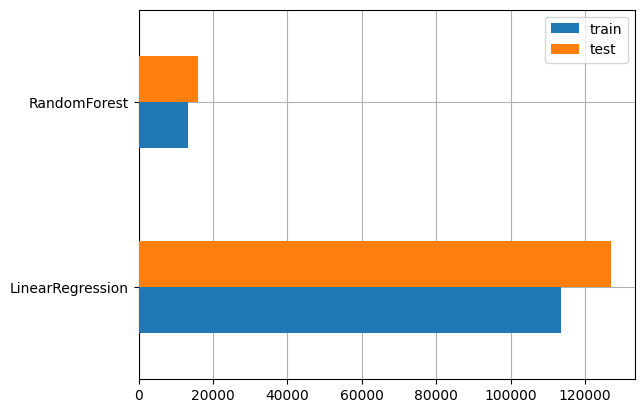

In [27]:
# Visualisasi plot metrik
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)


6.2 Melakukan Pengujian dari Kedua Model

In [28]:
# Melakukan pengujian terhadap model
prediksi = X_test.iloc[2:3].copy()
pred_dict = {'y_true':y_test[2:3]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_LinearRegression,prediksi_RandomForest
354,87000.0,81493.4,87768.2
